In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
from PIL import Image
from loguru import logger
from sklearn.model_selection import train_test_split

## Data access V1 generation for TCI only

In [2]:
DATASET_VERSION = "V1"
BASE_DIR = f"/mnt/disk/dataset/sentinel-ai-processor/{DATASET_VERSION}"
INPUT_DIR = os.path.join(BASE_DIR, "input")
TARGET_DIR = os.path.join(BASE_DIR, "output")

df_input = pd.read_csv(f"{BASE_DIR}/sample_input_l1c.csv", index_col=0)
df_target = pd.read_csv(f"{BASE_DIR}/sample_output_l2a.csv", index_col=0)

df_input["l1c_path"] = df_input["Name"].apply(lambda x: os.path.join(INPUT_DIR, os.path.basename(x).replace(".SAFE","")))
df_target["l2a_path"] = df_target["Name"].apply(lambda x: os.path.join(TARGET_DIR, os.path.basename(x).replace(".SAFE","")))

df_input["l1c_path"] = df_input["l1c_path"].apply(lambda x: glob.glob(os.path.join(x, "*.png")))
df_input["l1c_path"] = df_input["l1c_path"].apply(lambda file_list: file_list[0] if len(file_list) > 0 else None)

df_target["l2a_path"] = df_target["l2a_path"].apply(lambda x: glob.glob(os.path.join(x, "*.png")))
df_target["l2a_path"] = df_target["l2a_path"].apply(lambda file_list: file_list[0] if len(file_list) > 0 else None)

In [3]:
logger.info("L1C product {} ### Total:  {}".format(INPUT_DIR, len(df_input)))
logger.info("L2A product {} ### Total:  {}".format(TARGET_DIR, len(df_target)))

2025-04-24 12:03:55.234 | INFO     | __main__:<module>:1 - L1C product /mnt/disk/dataset/sentinel-ai-processor/V1/input ### Total:  15000
2025-04-24 12:03:55.245 | INFO     | __main__:<module>:2 - L2A product /mnt/disk/dataset/sentinel-ai-processor/V1/output ### Total:  15000


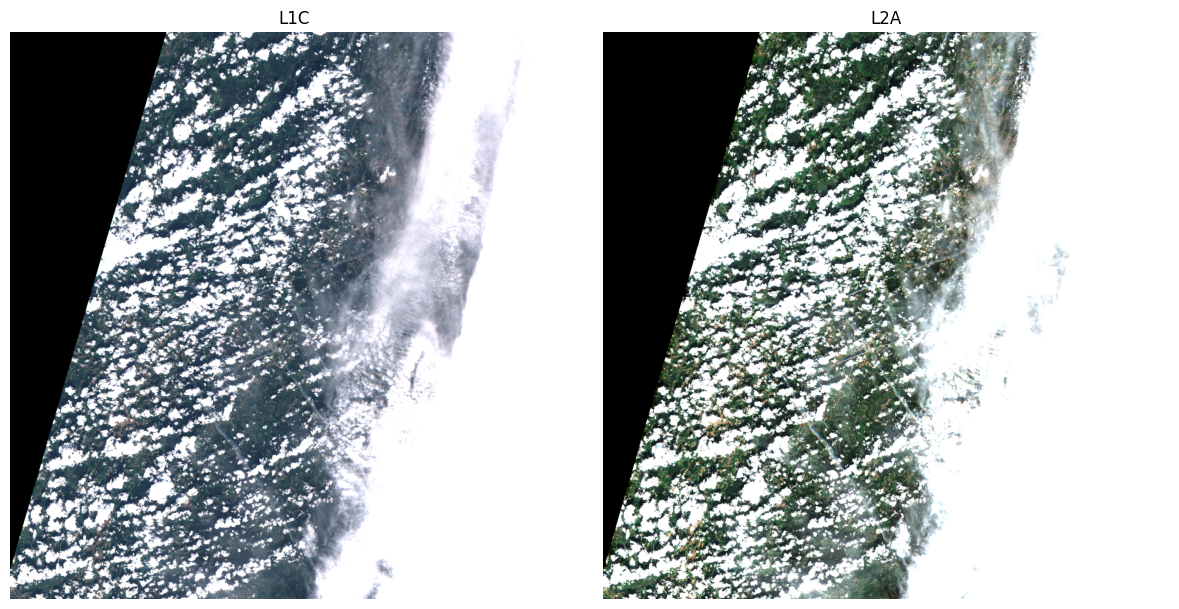

In [5]:
random_idx = random.randint(0, 2000)
image_input = Image.open(df_input["l1c_path"][random_idx])
image_output = Image.open(df_target["l2a_path"][random_idx])

input_array = np.array(image_input)
output_array = np.array(image_output)

# Display the RGB composites
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(input_array)
axes[0].set_title("L1C")
axes[0].axis('off')

axes[1].imshow(output_array)
axes[1].set_title("L2A")
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [11]:
df_train = pd.DataFrame(columns=['l1c_path','l2a_path','GeoFootprint'])
df_train['l1c_path'] = df_input['l1c_path'][:5000]
df_train['l2a_path'] = df_target['l2a_path'][:5000]
df_train['GeoFootprint']  = df_target['GeoFootprint'][:5000]

df_train, df_val = train_test_split(df_train, test_size=0.20, random_state=42)
df_val, df_test = train_test_split(df_val, test_size=0.20, random_state=42)


logger.info("len train: {}".format(len(df_train)))
logger.info("len val: {}".format(len(df_val)))
logger.info("len test: {}".format(len(df_test)))

2025-04-16 10:54:06.528 | INFO     | __main__:<module>:10 - len train: 4000
2025-04-16 10:54:06.529 | INFO     | __main__:<module>:11 - len val: 800
2025-04-16 10:54:06.530 | INFO     | __main__:<module>:12 - len test: 200


In [12]:
df_train.to_csv(f"{BASE_DIR}/train_path.csv")
df_test.to_csv(f"{BASE_DIR}/test_path.csv")
df_val.to_csv(f"{BASE_DIR}/val_path.csv")

In [22]:
df_val = df_val.reset_index(drop=True)

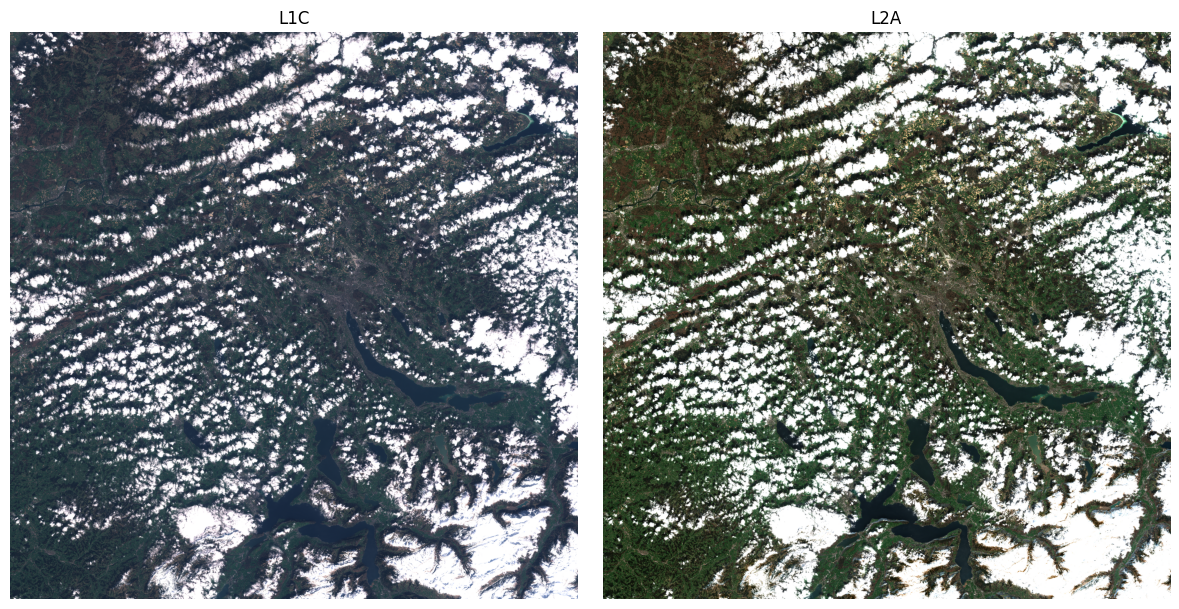

In [26]:
image_input = Image.open(df_val.l1c_path[0])
image_output = Image.open(df_val.l2a_path[0])

input_array = np.array(image_input)
output_array = np.array(image_output)

# Display the RGB composites
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(input_array)
axes[0].set_title("L1C")
axes[0].axis('off')

axes[1].imshow(output_array)
axes[1].set_title("L2A")
axes[1].axis('off')

plt.tight_layout()
plt.show()

## 

## 